In [32]:
import matplotlib.pyplot as plt
import numpy as np
import random
import gym
import time

GAME = 'BipedalWalker-v2'
MAX_STEPS = 1000
env = gym.make(GAME)
in_dimen = env.observation_space.shape[0]
out_dimen = env.action_space.shape[0]
dim=[in_dimen, 13, 8, 13, out_dimen]
N_GENERATION=50
N_pop = 200
selection=15

class NN:
    def __init__(self,dim):
        self.fitness=0.0
        self.dict={}
        for i in range(len(dim)-1):
            self.dict["W"+str(i+1)]=np.random.uniform(low=-1,high=1,size=(dim[i],dim[i+1]))
            self.dict["b"+str(i+1)]=np.random.uniform(low=-1,high=1,size=(dim[i+1]))

def sigmoid(z):
    s = 1./(1+np.exp(-z))
    return s
def propagate(NN,obs):    
    tmp=obs
       
    for i in range(len(dim)-1):
        z = np.dot(NN.dict["W"+str(i+1)].T,tmp)
        tmp = z+NN.dict["b"+str(i+1)]
        #tmp = sigmoid(A)
    return  tmp;
def crossover(NN1,NN2):
    NNN=NN(dim)    
    #loop over the weights
    for c in range(len(dim)-1):
        w1=NN1.dict["W"+str(c+1)]
        w2=NN1.dict["W"+str(c+1)]
        w=np.zeros_like(w1)
        for i in range (w1.shape[0]):
            for j in range (w1.shape [1]):
                if random.random() > 0.5 :
                    w[i][j]=w1[i][j]
                else:
                    w[i][j]=w2[i][j]
        NNN.dict["W"+str(c+1)]=w
        b1=NN1.dict["b"+str(c+1)]
        b2=NN2.dict["b"+str(c+1)]
        b = np.zeros_like(b1)
        for i in range(b1.shape[0]):
            if random.random() > 0.5:
                b[i]=b1[i]
            else:
                b[i]=b2[i]
        NNN.dict["b"+str(c+1)]=b
    return NNN

def mutation(NN,rate=0.01):
    
    for c in range(len(dim)-1):
        w=NN.dict["W"+str(c+1)]
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                if random.random() < rate:
                    NN.dict["W"+str(c+1)][i][j]=np.random.uniform(low=-1,high=1)
        b=NN.dict["b"+str(c+1)]
        for i in range(b.shape[0]):
            if random.random() < rate :
                NN.dict["b"+str(c+1)][i]=np.random.uniform(low=-1,high=1)
    return NN

def fitness(env,policy,n_episodes=100) :
    
    total_rewards = 0.0
    total_rewards += run(env, policy)
    return total_rewards 

def run(env, policy, episode_len=100):
    
    total_reward = 0
    obs = env.reset()
    for t in range(MAX_STEPS):
        #env.render()
        action = propagate(policy,obs)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward ;

best_NN=None
best_NN_fitness=-100000
population=[NN(dim) for _ in range(N_pop)]
avg=np.zeros(N_GENERATION)
best = np.zeros(N_GENERATION)
    #loop over generations , it could also be a while loop until we obtain for example a score of 0.9
start=time.time()
for i in range(N_GENERATION):
    #vector as the size of N_POPS contains the score of each pop
    rewards=np.zeros(N_pop)
    #calculate the score of each pop
    for j in range(N_pop):
        rewards[j]=fitness(env,population[j])
    print('For Generation',i+1,'maximum :',max(rewards)) 
    #sort of the rewards in order to select the best pops
    best_scores=np.argsort(rewards)
    #selection of best pops
    best[i] = max(rewards)
    if best[i]>best_NN_fitness:
        best_NN_fitness=best[i]
        best_NN=population[np.argmax(rewards)]
    avg[i] = np.mean(rewards)
    best_scores=best_scores[-selection:]
    best_pops=[]
    for c in range(selection):
        best_pops.append(population[best_scores[c]])
        #crossover the best ones randomly and ensure the same size of the pop
    new_pops=[]
    for j in range(N_pop):
        new_pops.append(crossover(best_pops[np.random.choice(len(best_scores))],best_pops[np.random.choice(len(best_scores))]))
            
    #Mutation over the newmly born pops
    all=[]
    for c in range(N_pop):
        all.append (mutation(new_pops[c],0.01))
    population=new_pops
end=time.time()

        

[2018-01-24 09:48:32,891] Making new env: BipedalWalker-v2


For Generation 1 maximum : -48.4754933062
For Generation 2 maximum : -55.1988084289
For Generation 3 maximum : -61.9957576991
For Generation 4 maximum : -43.6583805468
For Generation 5 maximum : -26.6842952183
For Generation 6 maximum : 30.0901361196
For Generation 7 maximum : 58.7201110777
For Generation 8 maximum : 13.7960894358
For Generation 9 maximum : 48.8964402999
For Generation 10 maximum : 37.1096795995
For Generation 11 maximum : 35.3392023594
For Generation 12 maximum : 30.7505643664
For Generation 13 maximum : 55.1482094709
For Generation 14 maximum : 57.9950798087
For Generation 15 maximum : 64.492097294
For Generation 16 maximum : 77.015002622
For Generation 17 maximum : 85.8662683201
For Generation 18 maximum : 80.9514910091
For Generation 19 maximum : 85.5040808725
For Generation 20 maximum : 99.0884445898
For Generation 21 maximum : 95.1802861593
For Generation 22 maximum : 101.804652064
For Generation 23 maximum : 97.4456028717
For Generation 24 maximum : 103.48429259

Running time :  2175.2052009105682


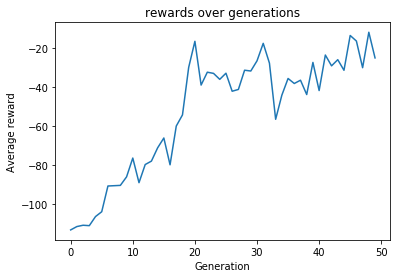

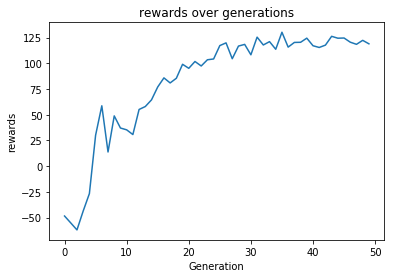

In [35]:
    print('Running time : ',(end-start))
    plt.plot(avg)
    plt.xlabel('Generation')
    plt.ylabel('Average reward')
    plt.title('rewards over generations')
    plt.show()
    plt.plot(best)
    plt.xlabel('Generation')
    plt.ylabel('rewards')
    plt.title('rewards over generations')
    plt.show()

In [36]:
## render the best NN
total_reward = 0
obs = env.reset()
for t in range(MAX_STEPS):
    #env.render()
    action = propagate(best_NN,obs)
    obs, reward, done, _ = env.step(action)
    total_reward += reward
    if done:
        break
